In [283]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import warnings; warnings.filterwarnings('ignore')

In [274]:
b_df = pd.read_csv('data/processed/benioff_cleaned.csv')
dfs = pd.read_csv('data/raw/CRM.csv')

In [272]:
b_df['Date'] = pd.to_datetime(b_df['Date'])
dfs.rename(columns={'Date':'date'}, inplace=True)

KeyError: 'Date'

In [275]:
b_df.head(20)

,Date,Close,Return,Tweets,Agg_count,Agg_retweet,Agg_favorite,Subjectivity_mean,Polarity_mean,Polarity_chg
0,2021-02-01,228.460007,NaN,NaN,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,2021-02-02,234.199997,0.024814,NaN,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,2021-02-03,234.820007,0.002644,NaN,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,2021-02-04,237.979996,0.013367,NaN,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,2021-02-05,238.889999,0.003817,NaN,0.0,0.0,0.0,0.000000,0.000000,0.000000
5,2021-02-08,238.929993,0.000167,NaN,0.0,0.0,0.0,0.000000,0.000000,0.000000
6,2021-02-09,236.699997,-0.009377,NaN,0.0,0.0,0.0,0.000000,0.000000,0.000000
7,2021-02-10,236.720001,0.000085,NaN,0.0,0.0,0.0,0.000000,0.000000,0.000000
8,2021-02-11,241.240005,0.018914,NaN,0.0,0.0,0.0,0.000000,0.000000,0.000000
9,2021-02-12,240.369995,-0.003613,NaN,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [276]:
b_df['Close'].std() # Calculating standard deviation (volatility) of Salesforce.com stock price

27.740858204641615

In [277]:
b_df['Tweets'].count() # Total count of Tweets for Benioff

155

In [278]:
b_df['Polarity_mean'].describe()

count    211.000000
mean       0.123792
std        0.106936
min       -0.062500
25%        0.000000
50%        0.119271
75%        0.205141
max        0.441970
Name: Polarity_mean, dtype: float64

In [279]:
b_df['Return'][0] = 0

In [280]:
df

,Date,Close,Return,Tweets,Agg_count,Agg_retweet,Agg_favorite,Subjectivity_mean,Polarity_mean,Polarity_chg
0,2021-02-01,228.460007,0.000000,NaN,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,2021-02-02,234.199997,0.024814,NaN,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,2021-02-03,234.820007,0.002644,NaN,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,2021-02-04,237.979996,0.013367,NaN,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,2021-02-05,238.889999,0.003817,NaN,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
206,2021-11-23,291.420013,-0.018428,"Congrats Ray Vara, ceo of Hawaii Pacific Healt...",7.0,1172.0,197.0,0.521602,0.257665,0.140775
207,2021-11-24,289.170013,-0.007751,"Im thankful for my family, friends, mentors &a...",11.0,61174.0,1001.0,0.291667,0.203030,-0.238305
208,2021-11-26,284.209991,-0.017301,NaN,0.0,0.0,0.0,0.000000,0.000000,0.000000
209,2021-11-29,296.739990,0.043143,: 🇺🇸 : Dancing with the feet and heart!! Congr...,4.0,3420.0,0.0,0.187500,0.200000,0.056290


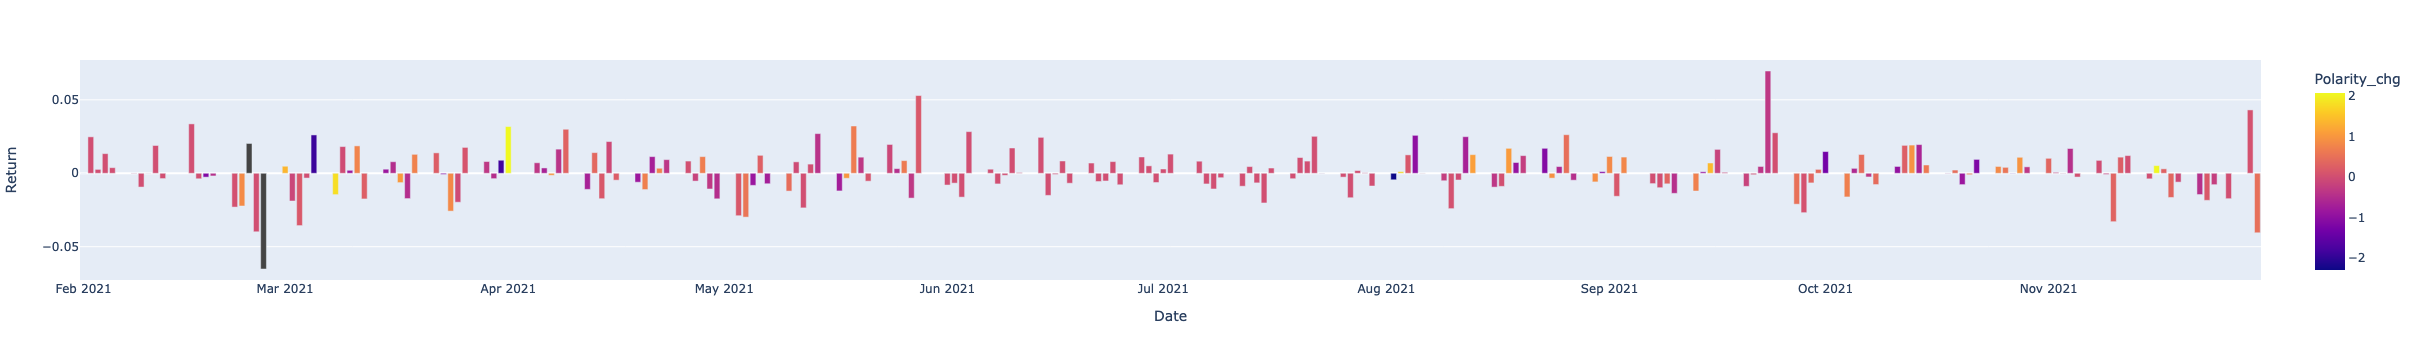

In [297]:
fig = go.Figure()

fig = px.bar(b_df, x='Date', y='Return', color='Polarity_chg')

fig.show()

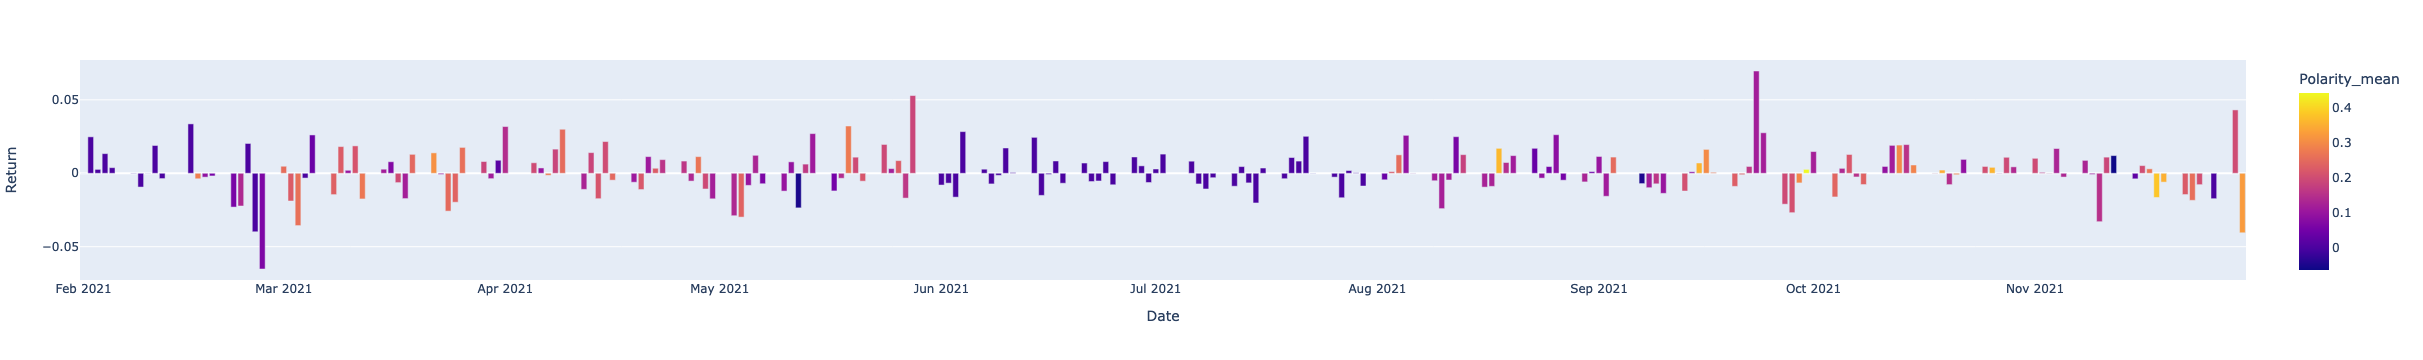

In [298]:
fig = go.Figure()

fig = px.bar(b_df, x='Date', y='Return', color='Polarity_mean')

fig.show()

### Sentiment Analysis using VADER

In [291]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for tweet in df1['full_text']:
    score = sia.polarity_scores(tweet)
    score['headline'] = tweet
    results.append(score)

df1['compound'] = pd.DataFrame(results)['compound'] # Creating the 'compound' column to store the results from the sentiment analysis

KeyError: 'full_text'

In [184]:
df['Tweets']

0                                                    NaN
1                                                    NaN
2                                                    NaN
3                                                    NaN
4                                                    NaN
                             ...                        
206    Congrats Ray Vara, ceo of Hawaii Pacific Healt...
207    Im thankful for my family, friends, mentors &a...
208                                                  NaN
209    : 🇺🇸 : Dancing with the feet and heart!! Congr...
210    Congrats to Salesforce’s New Board Members Lau...
Name: Tweets, Length: 211, dtype: object

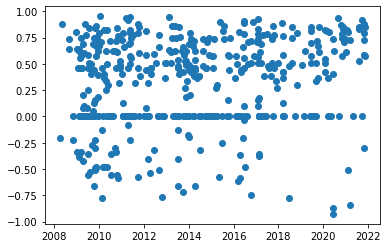

In [121]:
plt.scatter('date', 'compound', data=df1)

### Sentiment Analysis

In [139]:
import re

# Clean The Data
def cleantext(text):
    text = re.sub(r"@[A-Za-z0-9]+", "", text) # Remove Mentions
    text = re.sub(r"#", "", text) # Remove Hashtags Symbol
    text = re.sub(r"RT[\s]+", "", text) # Remove Retweets
    text = re.sub(r"https?:\/\/\S+", "", text) # Remove The Hyper Link
    
    return text

In [141]:
# Clean The Text
df1['full_text'] = df1['full_text'].apply(cleantext)
df1.head(10)

,date,full_text,id,source,favorite_count,retweet_count,compound
0,2021-11-04,Proud of the team for another strong quarter! ...,1456394103789277186,"<a href=""http://twitter.com/download/iphone"" r...",61,3,0.8516
1,2021-11-04,Congrats Kyle!,1456105938201374727,"<a href=""http://twitter.com/download/iphone"" r...",33,4,0.5707
2,2021-10-29,Excited for to join the Dropbox family! Unive...,1454105958913691650,"<a href=""https://mobile.twitter.com"" rel=""nofo...",95,13,0.8745
3,2021-10-28,"We're certainly supporting Apple Silicon, sorr...",1453765978198732802,"<a href=""https://mobile.twitter.com"" rel=""nofo...",479,48,0.7279
4,2021-10-28,Our communication in the support thread was...,1453763456398548993,"<a href=""https://mobile.twitter.com"" rel=""nofo...",8,0,0.5867
5,2021-10-28,Correct -- lots of technical changes in the O...,1453763117435949057,"<a href=""https://mobile.twitter.com"" rel=""nofo...",83,5,0.5867
6,2021-10-28,"We're certainly supporting Apple Silicon, sor...",1453762478479843332,"<a href=""https://mobile.twitter.com"" rel=""nofo...",118,11,0.7906
7,2021-10-27,: “People will leave companies where they don'...,1453438788303130624,"<a href=""https://mobile.twitter.com"" rel=""nofo...",0,14,-0.3040
8,2021-09-30,I didn’t and we don’t 😂,1443418145037832192,"<a href=""http://twitter.com/download/iphone"" r...",29,0,0.0000
9,2021-09-28,Super excited about these new product experien...,1443001837993426949,"<a href=""https://mobile.twitter.com"" rel=""nofo...",57,8,0.9134


In [145]:
from textblob import TextBlob

# Get The Subjectivity
def sentiment_analysis(ds):
    sentiment = TextBlob(ds['full_text']).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

# Adding Subjectivity & Polarity
df1[["subjectivity", "polarity"]] = df1.apply(sentiment_analysis, axis=1)

df1

,date,full_text,id,source,favorite_count,retweet_count,compound,subjectivity,polarity
0,2021-11-04,Proud of the team for another strong quarter! ...,1456394103789277186,"<a href=""http://twitter.com/download/iphone"" r...",61,3,0.8516,0.744444,0.447222
1,2021-11-04,Congrats Kyle!,1456105938201374727,"<a href=""http://twitter.com/download/iphone"" r...",33,4,0.5707,0.000000,0.000000
2,2021-10-29,Excited for to join the Dropbox family! Unive...,1454105958913691650,"<a href=""https://mobile.twitter.com"" rel=""nofo...",95,13,0.8745,0.662500,0.467187
3,2021-10-28,"We're certainly supporting Apple Silicon, sorr...",1453765978198732802,"<a href=""https://mobile.twitter.com"" rel=""nofo...",479,48,0.7279,0.750000,-0.233333
4,2021-10-28,Our communication in the support thread was...,1453763456398548993,"<a href=""https://mobile.twitter.com"" rel=""nofo...",8,0,0.5867,0.750000,0.800000
...,...,...,...,...,...,...,...,...,...
463,2008-10-27,Josh Groban singing Disarm... my inner 14-year...,976758647,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",0,0,-0.2263,0.166667,0.000000
464,2008-09-06,wish for more dropbox space granted!,912279893,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",0,0,0.6435,0.500000,0.625000
465,2008-08-27,"what happened? email us beta.com, it's pretty...",900233191,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",0,0,0.7351,1.000000,0.050000
466,2008-05-15,thanks for the love :),811537015,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",0,0,0.8779,0.600000,0.400000


In [149]:
#Polarity Change
df1["polarity_chg"] = df1["polarity"]
for i in range(len(df1)-1):
    df1["polarity_chg"].iloc[i]= (df1["polarity"].iloc[i]/df1["polarity"].iloc[i+1])

In [150]:
df1

,date,full_text,id,source,favorite_count,retweet_count,compound,subjectivity,polarity,polarity_chg
0,2021-11-04,Proud of the team for another strong quarter! ...,1456394103789277186,"<a href=""http://twitter.com/download/iphone"" r...",61,3,0.8516,0.744444,0.447222,inf
1,2021-11-04,Congrats Kyle!,1456105938201374727,"<a href=""http://twitter.com/download/iphone"" r...",33,4,0.5707,0.000000,0.000000,0.000000
2,2021-10-29,Excited for to join the Dropbox family! Unive...,1454105958913691650,"<a href=""https://mobile.twitter.com"" rel=""nofo...",95,13,0.8745,0.662500,0.467187,-2.002232
3,2021-10-28,"We're certainly supporting Apple Silicon, sorr...",1453765978198732802,"<a href=""https://mobile.twitter.com"" rel=""nofo...",479,48,0.7279,0.750000,-0.233333,-0.291667
4,2021-10-28,Our communication in the support thread was...,1453763456398548993,"<a href=""https://mobile.twitter.com"" rel=""nofo...",8,0,0.5867,0.750000,0.800000,2.000000
...,...,...,...,...,...,...,...,...,...,...
463,2008-10-27,Josh Groban singing Disarm... my inner 14-year...,976758647,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",0,0,-0.2263,0.166667,0.000000,0.000000
464,2008-09-06,wish for more dropbox space granted!,912279893,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",0,0,0.6435,0.500000,0.625000,12.500000
465,2008-08-27,"what happened? email us beta.com, it's pretty...",900233191,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",0,0,0.7351,1.000000,0.050000,0.125000
466,2008-05-15,thanks for the love :),811537015,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",0,0,0.8779,0.600000,0.400000,-2.739300


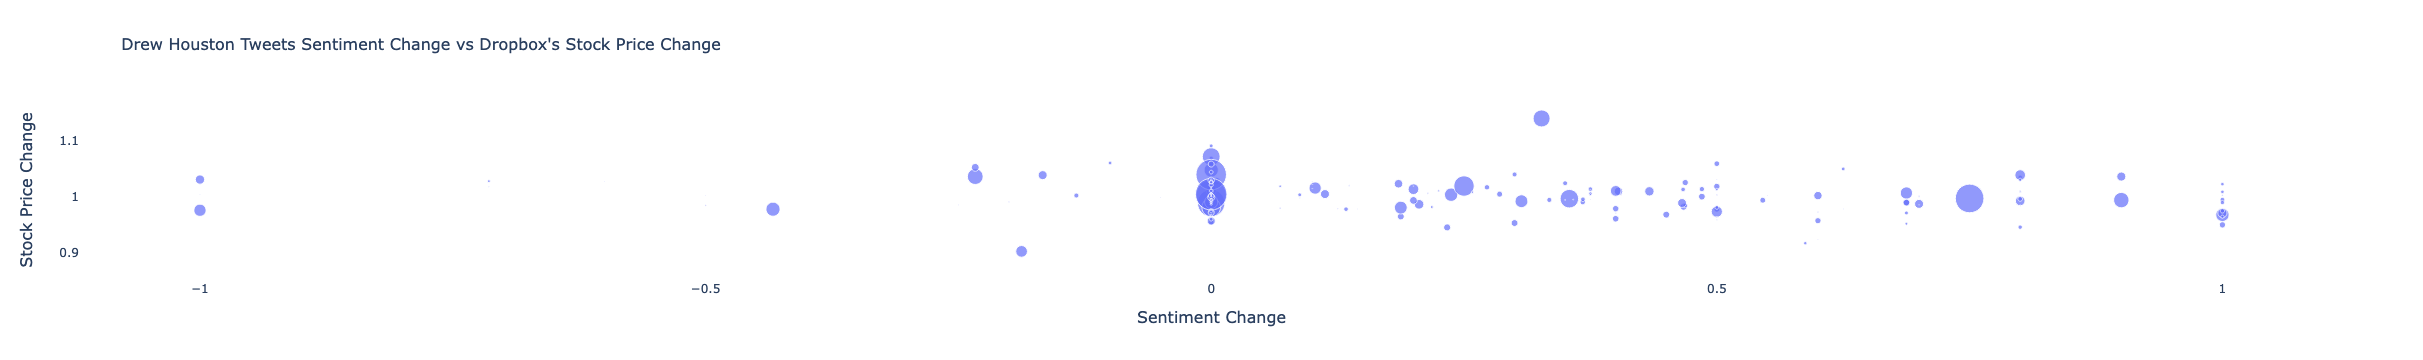

In [155]:
import plotly.graph_objects as go

fig = go.Figure()
_ = fig.add_trace(go.Scatter(
    x= df1["polarity"],
    y= dfs['var'],
    mode="markers",
    marker={"size": df1['favorite_count'], "sizemode": "area",
                                    "sizeref": 2*max(df1['favorite_count']/1000)},
    hovertemplate= "Polarity of Tweets: %{x:.1f}<br>" +
    "Stock Price Change: %{y:.1f}<br>" +
    "Number of Likes: %{marker.size:,}" +
    "<extra></extra>"
))
fig.update_layout(
    plot_bgcolor="white",
    # hovermode="x",
    xaxis={"title": {"text": "Sentiment Change", "font": {"size": 16}}},
    yaxis={"title": {"text": "Stock Price Change", "font": {"size": 16}}},
    title={'text': "Drew Houston Tweets Sentiment Change vs Dropbox's Stock Price Change", "font": {"size": 16}}
)
fig.show()

In [185]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
allwords = " ".join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 21, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

TypeError: sequence item 0: expected str instance, float found

In [186]:
df.dtypes

Date                 datetime64[ns]
Close                       float64
Return                      float64
Tweets                       object
Agg_count                   float64
Agg_retweet                 float64
Agg_favorite                float64
Subjectivity_mean           float64
Polarity_mean               float64
Polarity_chg                float64
dtype: object